# Buts à domicile vs l'extérieur

La Premier League est le championnat d'Angleterre de football où s'affrontent du mois d'août au mois de mai suivant, vingt clubs professionnels.

Les données proviennent du site http://www.football-data.co.uk/englandm.php
Nous utiliserons les données de la saison 2013-2014 jusqu'à la saison 2018-2019

Nous garderons en variable la date, le nom des équipes à domicile et à l'extérieur et leur nombre de buts marqués.

#### Modélisation :

Pour un match de Premier League donné, on note :
- X la variable aléatoire qui compte le nombre de buts inscrits par l'équipe jouant à domicile
- Y la variable aléatoire qui compte le nombre de buts inscrits par l'équipe jouant à l'extérieur

#### Objectifs :

- Dresser la table de probabilité du couple (X,Y) puis la représenter à l'aide d'une data visualisation
- Calculer pour X et Y leurs espérances et leurs écarts-types
- Calculer l'espérance de XY pour en déduire la covariance de X et de Y

On pourra ainsi pour un match quelconque, mesurer en moyenne le comportement des équipes entre elles.

## Etape 1 : Table de probabilité de (X,Y)

#### Lecture et traitement du jeu de données

In [1]:
import pandas as pd

In [9]:
df1 = pd.read_csv('./data/foot_1league_2013_2014.csv')
df2 = pd.read_csv('./data/foot_1league_2014_2015.csv')
df3 = pd.read_csv('./data/foot_1league_2015_2016.csv')
df4 = pd.read_csv('./data/foot_1league_2016_2017.csv')
df5 = pd.read_csv('./data/foot_1league_2017_2018.csv')
df6 = pd.read_csv('./data/foot_1league_2018_2019.csv')

In [10]:
T = df1.append(df2, ignore_index=True)
T = T.append(df3, ignore_index=True)
T = T.append(df4, ignore_index=True)
T = T.append(df5, ignore_index=True)
T = T.append(df6, ignore_index=True)

T.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,17/08/13,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,...,2.37,NaN,NaN,NaN,NaN,NaN,NaN,1.44,5.00,8.05
1,E0,17/08/13,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,...,2.02,NaN,NaN,NaN,NaN,NaN,NaN,1.42,4.62,10.19
2,E0,17/08/13,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,...,1.82,NaN,NaN,NaN,NaN,NaN,NaN,3.81,3.27,2.21
3,E0,17/08/13,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,...,1.77,NaN,NaN,NaN,NaN,NaN,NaN,2.52,3.23,3.16
4,E0,17/08/13,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,...,1.98,NaN,NaN,NaN,NaN,NaN,NaN,3.62,3.41,2.22


In [11]:
col = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']
T = T[col]
T.rename(columns={'HomeTeam' : "DOM", 'AwayTeam' : "EXT", 
                  'FTHG' : "BDOM", 'FTAG' : "BEXT"}, inplace=True)
T.head()

,Date,DOM,EXT,BDOM,BEXT
0,17/08/13,Arsenal,Aston Villa,1.0,3.0
1,17/08/13,Liverpool,Stoke,1.0,0.0
2,17/08/13,Norwich,Everton,2.0,2.0
3,17/08/13,Sunderland,Fulham,0.0,1.0
4,17/08/13,Swansea,Man United,1.0,4.0


In [12]:
len(T)

2281

#### Table de probabilité

In [14]:
pd.crosstab(T['BDOM'], T['BEXT'], margins=True, normalize=False)
# Table croisée des effectifs des variables BDOM et BEXT

BEXT,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
BDOM,,,,,,,,,
0.0,171,173,96,67,26,5,2,0,540
1.0,230,221,156,70,30,8,1,1,717
2.0,204,171,119,44,8,2,1,0,549
3.0,96,112,48,21,5,1,2,0,285
4.0,50,46,21,10,0,1,0,0,128
5.0,20,16,1,3,2,0,0,0,42
6.0,5,7,2,2,0,0,0,0,16
7.0,1,0,1,0,0,0,0,0,2
8.0,1,0,0,0,0,0,0,0,1


In [17]:
P = pd.crosstab(T['BDOM'], T['BEXT'], margins=True, normalize=True)
P.round(3)
# En modifiant le paramètre 'normalize' on obtient les fréquences

BEXT,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
BDOM,,,,,,,,,
0.0,0.075,0.076,0.042,0.029,0.011,0.002,0.001,0.0,0.237
1.0,0.101,0.097,0.068,0.031,0.013,0.004,0.000,0.0,0.314
2.0,0.089,0.075,0.052,0.019,0.004,0.001,0.000,0.0,0.241
3.0,0.042,0.049,0.021,0.009,0.002,0.000,0.001,0.0,0.125
4.0,0.022,0.020,0.009,0.004,0.000,0.000,0.000,0.0,0.056
5.0,0.009,0.007,0.000,0.001,0.001,0.000,0.000,0.0,0.018
6.0,0.002,0.003,0.001,0.001,0.000,0.000,0.000,0.0,0.007
7.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.001
8.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000


#### Modèle retenu : 

La table P représente la table de probabilité du couple (X,Y), ainsi : P([X=0]&[Y=3]) = 0,029

#### Support

- Le support de X est l'ensemble des valeurs entre 0 et 8
- Le support de Y est l'ensemble des valeurs entre 0 et 7

#### Indépendance

2 variables sont indépendantes si P(A) x P(B) = P(A&B) 

P(BDOM=0) x P(BEXT=3)
=0.237 x 0.095 = 0.022

Donc les variables X et Y sont dépendantes

#### Espérances

E[X] = SOMME(X=k x P(X=k)) avec k=[0,8]

E[X] = 0 x 0.237 + 1 x 0.314 + ... + 8 x 0

In [21]:
EX = 0
for i in range(9):
    EX = EX + i * P.loc[i, 'All']

In [22]:
EX

1.539473684210526

In [32]:
EY = 0
for i in range(8):
    EY = EY + i * P.loc['All', i]

In [33]:
EY

1.1828947368421052

#### Data visualisation de la loi de probabilité de (X,Y)

- Au point (i,j) appartenant au support de X et Y, on représente P([X=i]&[Y=j]) par un carré égale à P.loc[j,i]
- Par construction l'aire totale des carrés coloriés (non-hachurés) est égale à l'aire du carré quadrillé

In [35]:
import pylab as pl
pl.style.use('bmh')

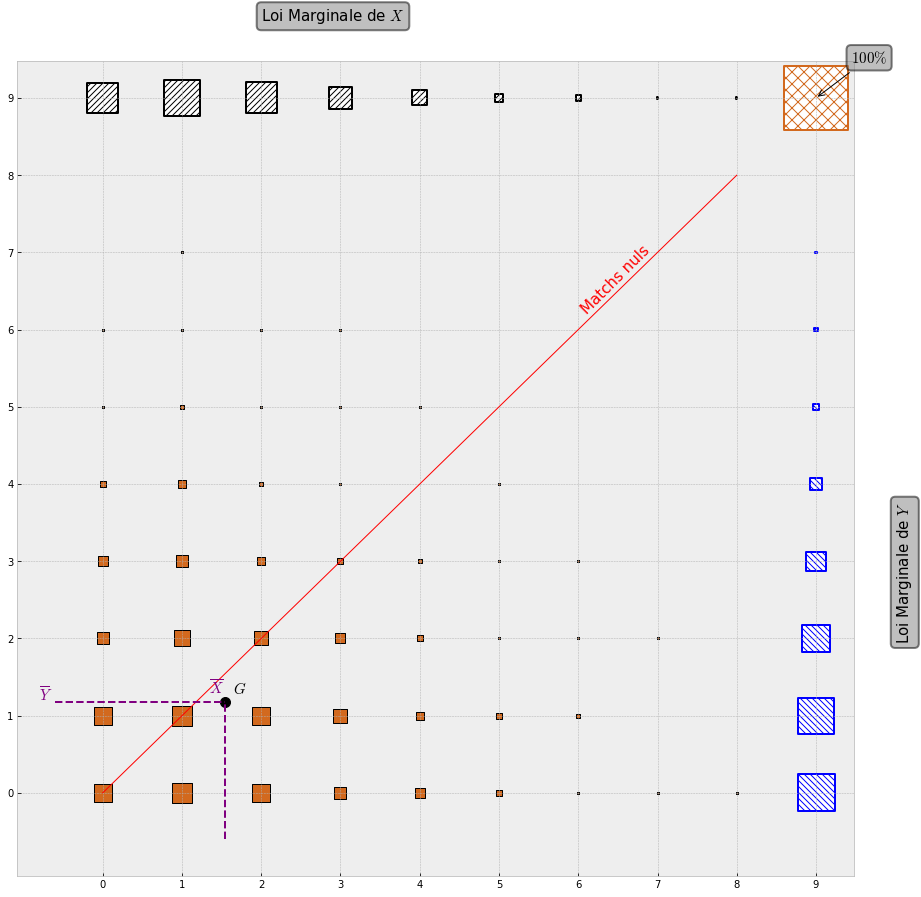

In [71]:
fig = pl.figure(1, figsize=(15, 15))

# création ligne rouge + point de l'espérance
pl.plot([0,8], [0,8], color='red', linewidth=1)
pl.plot(EX, EY, 'o', color='black', markersize=10)

pl.xticks(range(10))
pl.yticks(range(10))

#code pour les carrés

for i in range(8):
    for j in range(9):
        pl.scatter(j, i, marker='s', 
                   facecolor='chocolate',
                   edgecolor='black',
                   s=4000*P.loc[j,i],
                   linewidth=1)

for k in range(9):
    pl.scatter(k, 9, marker='s',
               facecolor='white',
               color='black',
               hatch='////',
               s=4000*P.loc[k,'All'],
               linewidth=2)
    
for k in range(8):
    pl.scatter(9, k, marker='s',
               facecolor='white',
               color='blue',
               hatch='\\\\\\\\',
               s=4000*P.loc['All', k],
               linewidth=2)
    
pl.scatter(9,9, marker='s',
           facecolor='white',
           color='chocolate',
           hatch='xx',
           s=4000,
           linewidth=2)



# décorations

bbox_props = dict(boxstyle = 'round', pad=0.3,
                  fc='gray', alpha=0.5, 
                  ec='black', lw=2)

pl.text(x=2, y=10,
        s=r'Loi Marginale de $X$',
        fontsize = 15,
        color = 'black',
        bbox=bbox_props)
pl.text(x=10, y=2,
        s=r'Loi Marginale de $Y$', 
        fontsize=15,
        color='black',
        bbox = bbox_props,
        rotation=90)
pl.text(x = EX +0.1, y= EY+0.1,
        s = r'$G$',
        fontsize=15,
        color = 'black')
pl.text(x = EX- 0.2, y=EY+0.1,
        s=r'$\overline{X}$',
        fontsize=15,
        color='purple')
pl.plot([EX,EX], [-0.6, EY], '--',
        color='purple', linewidth=2)
pl.text(x= -0.8, y =EY,
        s= r'$\overline{Y}$',
        fontsize=15,
        color='purple')
pl.text(x=6, y=6.2, s= r'Matchs nuls',
        fontsize=15,
        color='red',
        rotation=45)
pl.plot([-0.6, EX], [EY,EY], '--',
        color='purple',
        linewidth=2)

pl.annotate(r'$100\%$',
            xy = (9,9),
            xycoords = 'data',
            xytext=(35,35),
            textcoords = 'offset points',
            arrowprops = dict(arrowstyle = '->',
                              color = 'black',
                              connectionstyle = 'arc3',
                              linewidth = 1),
            fontsize =15,
            color = 'black',
            bbox = bbox_props)

pl.show()

###### Considérons le carré situé au point de coordonnées (0,9)

- L'aire est égale à P(X=0) qui égale à la somme des carrés situés au coordonnées (0,k) avec k appartenant [0,8]

- En effet, P(X=0) = P(X=0&Y=0)+P(X=0&Y=1)+...P(X=0&Y=8)

###### Considérons le carré situé au point de coordonnées (9,1)

- L'aire est égale à P(Y=1) qui égale à la somme des carrés situés au coordonnées (k,1) avec k appartenant [0,8]

- En effet, P(Y=1) = P(X=0&Y=1)+P(X=1&Y=1)+...P(X=8&Y=1)

## Etape 2 : Corrélation entre X et Y

#### Ecart-type de X

In [79]:
EX2 = 0
for i in range(9):
    EX2 = EX2 + i*i*P.loc[i, 'All'] 

In [99]:
EX2

4.0850877192982455

In [80]:
# On va calculer l'écart-type avec la formule racine(EX2-EX*EX)
import numpy as np

SX = np.sqrt(EX2-EX*EX)

In [84]:
SX

1.3096215082692841

#### Ecart-type de Y

In [102]:
EY2 = 0
for j in range(8):
    EY2 = EY2 + j**2*P.loc['All', j]

In [103]:
EY2

2.76359649122807

In [104]:
SY = np.sqrt(EY2-EY*EY)

In [105]:
SY

1.1680567335447867

- Donc Y fluctue le moins autour de son espérance

#### Loi de XY

In [86]:
R = T.groupby(['BDOM', 'BEXT']).count()
R = R[['Date']]
R.reset_index(inplace = True)
R

# C'est la table de tout les différents score

,BDOM,BEXT,Date
0,0.0,0.0,171
1,0.0,1.0,173
2,0.0,2.0,96
3,0.0,3.0,67
4,0.0,4.0,26
5,0.0,5.0,5
6,0.0,6.0,2
7,1.0,0.0,230
8,1.0,1.0,221
9,1.0,2.0,156


Par exemple on voit qu'on a eu 171 '0-0'

In [87]:
R['Freq'] = R['Date']/len(T)

In [89]:
R['X*Y'] = R['BDOM']*R['BEXT']

In [91]:
Prod = R.groupby('X*Y').sum()
Prod

,BDOM,BEXT,Date,Freq
X*Y,,,,
0.0,36.0,21.0,1147,0.502850
1.0,1.0,1.0,221,0.096887
2.0,3.0,3.0,327,0.143358
3.0,4.0,4.0,182,0.079790
4.0,7.0,7.0,195,0.085489
5.0,6.0,6.0,24,0.010522
6.0,12.0,12.0,100,0.043840
7.0,1.0,7.0,1,0.000438
8.0,6.0,6.0,29,0.012714


P(XY=0) = 0.50
P(XY=2) = 0.14

In [107]:
EXY = 0
for i in Prod.index:
    EXY = EXY + i*Prod.loc[i,'Freq']

In [108]:
EXY

1.6663743971942129

#### Covariance de X et de Y

- On rappelle que la covariance de X et de Y, notée cov(X,Y) est défini par cov(X,Y) = E[(X-E[X])(Y-E[Y])

- Donc cov(X,Y) = E[XY] - E[X] x E[Y]

In [109]:
CovXY = EXY - (EX*EY)
print(CovXY)

-0.1546609213653436


- En moyenne, lorsque X >= E[X], alors Y <= E[Y]
- En moyenne, lorsque X <= E[X], alors Y => E[Y]

Les performances de l'équipe jouant à domicile et de l'équipe jouant à l'extérieur sont donc contraires

#### Loi de probabilité de X et de Y

In [110]:
S = T.groupby(['BDOM', 'BEXT']).count()
S = S[['Date']]
S.reset_index(inplace = True)
S['Freq']  = S['Date']/len(T)
S['X+Y'] = S['BDOM'] + S['BEXT']
S

,BDOM,BEXT,Date,Freq,X+Y
0,0.0,0.0,171,0.074967,0.0
1,0.0,1.0,173,0.075844,1.0
2,0.0,2.0,96,0.042087,2.0
3,0.0,3.0,67,0.029373,3.0
4,0.0,4.0,26,0.011399,4.0
5,0.0,5.0,5,0.002192,5.0
6,0.0,6.0,2,0.000877,6.0
7,1.0,0.0,230,0.100833,1.0
8,1.0,1.0,221,0.096887,2.0
9,1.0,2.0,156,0.068391,3.0


In [111]:
S = S.groupby('X+Y').sum()
S

,BDOM,BEXT,Date,Freq
X+Y,,,,
0.0,0.0,0.0,171,0.074967
1.0,1.0,1.0,403,0.176677
2.0,3.0,3.0,521,0.228409
3.0,6.0,6.0,490,0.214818
4.0,10.0,10.0,377,0.165278
5.0,15.0,15.0,193,0.084612
6.0,21.0,21.0,81,0.035511
7.0,28.0,21.0,27,0.011837
8.0,25.0,23.0,9,0.003946


In [112]:
S = S['Freq']
S.reset_index()

,X+Y,Freq
0,0.0,0.074967
1,1.0,0.176677
2,2.0,0.228409
3,3.0,0.214818
4,4.0,0.165278
5,5.0,0.084612
6,6.0,0.035511
7,7.0,0.011837
8,8.0,0.003946
9,9.0,0.003507
